In [94]:
import matplotlib.pyplot as plt #Libraries for visualization
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np #Library for numerical calculations
from scipy import stats #Library for statistical analysis
from sklearn import datasets #Libraries for machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [95]:
df = pd.read_csv('us_national.csv')
df

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2013-09-01,2013-09-30,30,national,11,1400,f,National,National,U.S.,...,0.019563,0.062720,0.006790,0.006161,0.262773,-0.017504,-0.042618,NaN,NaN,2023-01-15 14:42:04
1,2014-07-01,2014-07-31,30,national,11,1400,f,National,National,U.S.,...,-0.026645,0.077073,0.003756,0.020332,0.290919,-0.010735,-0.000143,NaN,NaN,2023-01-15 14:42:04
2,2017-09-01,2017-09-30,30,national,11,1400,f,National,National,U.S.,...,0.016016,0.097603,-0.000295,-0.001058,0.402473,0.005173,0.041389,NaN,NaN,2023-01-15 14:42:04
3,2020-05-01,2020-05-31,30,national,11,1400,f,National,National,U.S.,...,-0.004210,0.084985,0.007821,-0.017420,0.399424,0.083085,-0.043231,NaN,NaN,2023-01-15 14:42:04
4,2018-06-01,2018-06-30,30,national,11,1400,f,National,National,U.S.,...,0.012185,0.149537,0.010169,0.019675,0.415500,-0.042659,0.018937,NaN,NaN,2023-01-15 14:42:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,2021-02-01,2021-02-28,30,national,11,1400,t,National,National,U.S.,...,0.163490,0.090224,-0.005336,-0.041902,0.483637,-0.009935,0.082770,NaN,NaN,2023-01-15 00:00:00
1448,2013-08-01,2013-08-31,30,national,11,1400,t,National,National,U.S.,...,0.040843,0.060890,0.002609,0.002175,0.365011,-0.009772,0.007355,NaN,NaN,2023-01-15 00:00:00
1449,2018-02-01,2018-02-28,30,national,11,1400,t,National,National,U.S.,...,0.022025,0.126219,0.004020,0.005939,0.404988,0.001157,0.016444,NaN,NaN,2023-01-15 00:00:00
1450,2012-04-01,2012-04-30,30,national,11,1400,t,National,National,U.S.,...,NaN,0.059487,-0.001724,NaN,0.273479,0.001005,NaN,NaN,NaN,2023-01-15 00:00:00


In [96]:
le = LabelEncoder()
df = df.drop(columns=[col for col in df.columns if "id" in col], axis=1)
df = df.loc[:, (df != df.iloc[0]).any()]
df = df.dropna(axis=1, how='all')
df.fillna(df.median(), inplace=True)
df = df.drop(labels = ['last_updated'], axis=1) #removing irrelevant parameters, ones that are ids, all have the same value or nan
df = df.iloc[:, 2:] #dropping the periods to make the data simpler to use, an alternative would be to use just the year since it is a relevant parameter, i just expect the other parameters to be enough in this specific analysis
df.iloc[:,:2] = df.iloc[:,:2].apply(le.fit_transform)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = 1.5 * IQR


df = df[~((df < (Q1 - outlier_threshold)) | (df > (Q3 + outlier_threshold))).any(axis=1)]
column_names = df.columns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()
# df = scaler.fit_transform(df)
# df = pd.DataFrame(df,columns=column_names)

X= df.drop(columns = ['property_type'])
y = df['property_type']


print(X.shape)
print(y.shape)
df

(602, 43)
(602,)


,is_seasonally_adjusted,property_type,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,...,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy
2,0,5,242999.000000,0.006764,0.050383,257980.000000,0.045297,0.065170,152.000000,0.008776,...,0.002909,0.252099,-0.015016,0.016016,0.097603,-0.000295,-0.001058,0.402473,0.005173,0.041389
4,0,4,292611.000000,0.019186,0.053400,299829.000000,-0.024614,0.062953,156.000000,0.012703,...,0.001875,0.296685,0.001505,0.012185,0.149537,0.010169,0.019675,0.415500,-0.042659,0.018937
10,0,5,265772.000000,0.026362,0.032726,278252.000000,-0.002168,0.026636,162.000000,0.017325,...,-0.004789,0.263703,0.022822,-0.040647,0.129573,0.010610,0.020727,0.472397,-0.010374,-0.052536
12,0,5,217762.000000,0.007742,0.063319,223343.000000,-0.019321,0.063156,138.000000,-0.002345,...,0.003808,0.210108,-0.007098,0.017439,0.121259,0.008380,0.011765,0.322945,-0.008528,0.020264
15,0,1,223563.000000,0.027319,0.081258,237813.000000,0.007927,0.093693,190.000000,0.038157,...,0.002821,0.221668,-0.000857,0.012917,0.108885,0.005634,0.000626,0.366949,-0.027602,0.030410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,1,4,214932.165303,0.001652,0.080756,229188.954490,0.019623,0.077985,116.842396,0.003053,...,-0.002016,0.197193,-0.003855,-0.026827,0.087611,0.012898,0.032147,0.306234,-0.013499,-0.013621
1446,1,1,192870.069618,0.000418,0.059784,202005.057436,-0.002825,0.071780,164.827970,-0.007616,...,-0.003959,0.162704,0.004202,-0.038707,0.088645,-0.005460,0.020017,0.304044,-0.003728,-0.011730
1449,1,4,278361.746342,0.011058,0.074147,291358.869134,0.002413,0.078590,150.347107,0.007213,...,0.003417,0.254003,0.003122,0.022025,0.126219,0.004020,0.005939,0.404988,0.001157,0.016444
1450,1,0,177432.705874,0.012467,0.070698,187931.548451,-0.008908,0.070539,97.221372,0.008180,...,0.003214,0.179483,-0.005890,0.017451,0.059487,-0.001724,0.002987,0.273479,0.001005,0.021020


In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)


print(pca.explained_variance_)

X_pca = pca.transform(X)
print(X_pca.shape)
X_pca = scaler.fit_transform(X_pca)
#X = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=0.2, random_state=1)

[7.0659285e+11 3.2748280e+10]
(602, 2)


# Kmeans Clustering


Text(0.5, 1.0, 'Mean Absolute Error')

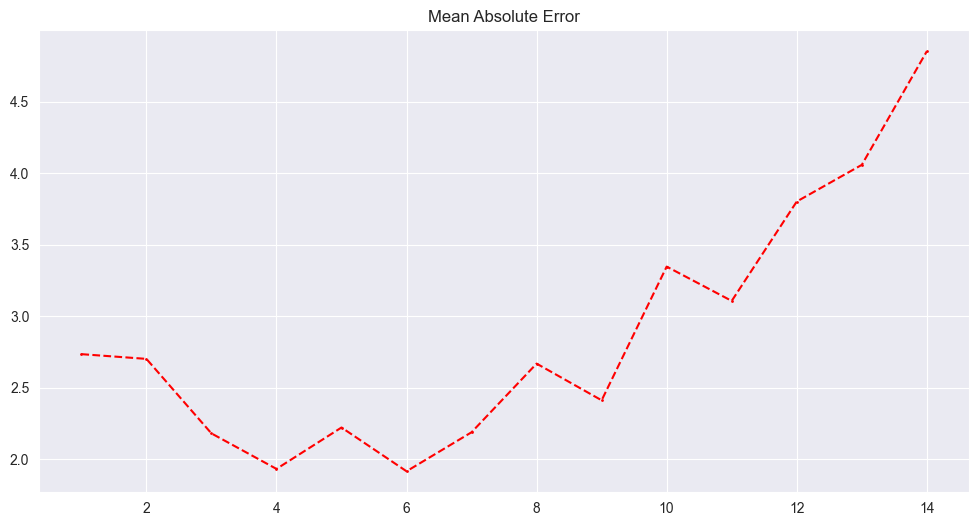

In [98]:
from sklearn import metrics
from sklearn.cluster import KMeans
err = []

for i in range(1, 15):
    model = KMeans(n_clusters=i, max_iter=300, random_state=0)
    model.fit(X_train)
    Y_temp = np.ravel(Y_test)
    pred_i = model.predict(X_test)
    err.append(metrics.mean_absolute_error(Y_test, pred_i))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), err, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=1)
plt.title('Mean Absolute Error')


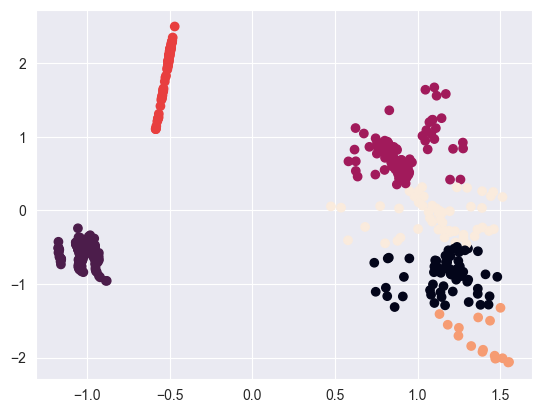

Mean Absolute Error: 1.9173553719008265
Mean Squared Error: 6.87603305785124
Root Mean Squared Error: 2.622219109428356


In [99]:
model = KMeans(n_clusters=6, max_iter=300, random_state=0)
model.fit(X_train)
predicted = model.predict(X_test)
labels = model.labels_

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print("Mean Absolute Error: " + str(metrics.mean_absolute_error(Y_test, predicted)))
print("Mean Squared Error: " + str(metrics.mean_squared_error(Y_test, predicted)))
print("Root Mean Squared Error: " + str(np.sqrt(metrics.mean_squared_error(Y_test, predicted))))

# Agglomerative Clustering

Silhouette score: 0.71


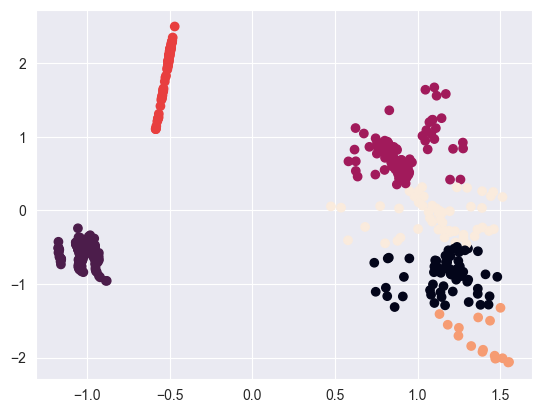

In [100]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=6).fit(X_train)
score = silhouette_score(X_train, labels)
print("Silhouette score: {:.2f}".format(score))
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

# Gaussian Mixture Model Clustering

Silhouette score: 0.70


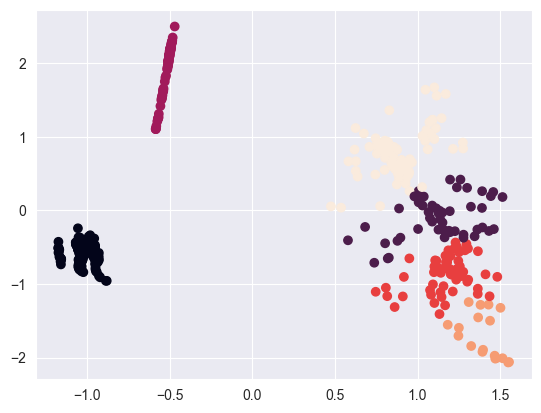

In [103]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=6)
model.fit(X_train)
labels = model.predict(X_train)

score = silhouette_score(X_train, labels)
print("Silhouette score: {:.2f}".format(score))
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()